### Objectifs du notebook :

- Importer librairies
- importer fichiers csv train.set et validation.set

- Créer source et dataset

- Splitter le train.set de 10% en 10% (0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9)
- entrainer le modèle sur ces train.set.splitter
- faire les prédictions avec le validation.set et le train.set.splitter

- calculer AUC pour tous ces cas

- Dessiner les graphs montrant l'évolution de la performance en fonction de la taille du train_set

## Importation des librairies et du code du project pour l'API BigML

In [7]:
from bigml.api import BigML
from pandas import read_csv
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import json

# train_set = read_csv('csv_file/train_set.csv')
# validation_set = read_csv('csv_file/validation_set.csv')

api = BigML(project='project/5d94a454eba31d46690001d1')

### Création des sources et des datasets sur BigMl via l'API

In [8]:
#Train_set
# Creation d'une source
train_source = api.create_source('csv_file/train_set.csv')
api.ok(train_source)
# Creation d'un dataset ( = source )
train_dataset = api.create_dataset(train_source)
api.ok(train_dataset)

True

In [9]:
# Validation_set
# Creation d'une source
validation_source = api.create_source('csv_file/validation_set.csv')
api.ok(validation_source)
# Creation d'un dataset ( = source )
validation_dataset = api.create_dataset(validation_source)
api.ok(validation_dataset)

True

### Méthode pour faire le split du train_set 

- en fonction du pourcentage du train_set souhaité

In [10]:
def split_train(split_rate):
    train_split_set = api.create_dataset(train_dataset,{"name": "train_split_set", "sample_rate": split_rate, "seed": "my seed"})
    api.ok(train_split_set)
    return train_split_set

train_10 = split_train(10/100)
train_20 = split_train(20/100)
train_30 = split_train(30/100)
train_40 = split_train(40/100)
train_50 = split_train(50/100)
train_60 = split_train(60/100)
train_70 = split_train(70/100)
train_80 = split_train(80/100)
train_90 = split_train(90/100)
train_100 = split_train(100/100)

### Méthodes pour entraîner des datasets sur un modèle choisi :

In [11]:
def model_ensemble(dataset):
    ensemble = api.create_ensemble(dataset,{"objective_field" : "SeriousDlqin2yrs"})
    api.ok(ensemble)
    return ensemble
    
ensemble_train_10 = model_ensemble(train_10)
ensemble_train_20 = model_ensemble(train_20)
ensemble_train_30 = model_ensemble(train_30)
ensemble_train_40 = model_ensemble(train_40)
ensemble_train_50 = model_ensemble(train_50)
ensemble_train_60 = model_ensemble(train_60)
ensemble_train_70 = model_ensemble(train_70)
ensemble_train_80 = model_ensemble(train_80)
ensemble_train_90 = model_ensemble(train_90)
ensemble_train_100 = model_ensemble(train_100)

In [12]:
def model_deepnet(dataset):
    deepnet = api.create_deepnet(dataset, {"objective_field" : "SeriousDlqin2yrs"})
    api.ok(deepnet)
    return deepnet

deepnet_train_10 = model_deepnet(train_10)
deepnet_train_20 = model_deepnet(train_20)
deepnet_train_30 = model_deepnet(train_30)
deepnet_train_40 = model_deepnet(train_40)
deepnet_train_50 = model_deepnet(train_50)
deepnet_train_60 = model_deepnet(train_60)
deepnet_train_70 = model_deepnet(train_70)
deepnet_train_80 = model_deepnet(train_80)
deepnet_train_90 = model_deepnet(train_90)
deepnet_train_100 = model_deepnet(train_100)

### Méthode pour faire les prédictions d'un modèle entraîné sur un dataset

- en fonction d'un modèle et d'un dataset choisis

In [16]:
def batchprediction(model, dataset):
    batch_prediction = api.create_batch_prediction(model, dataset,{"header": True, 
                                                                    "all_fields": True, 
                                                                    "prediction_name": "my_prediction", 
                                                                    "probabilities": True})
    api.ok(batch_prediction)
    return batch_prediction

## On fait toutes les prédictions souhaitées :

- sur tous les train_set créés avec le splits
- sur le validation_set
- avec les 2 modèles ensemble et deepnet

In [17]:
batch_prediction_ens_val_10 = batchprediction(ensemble_train_10, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_10,filename='BatchPrediction/train10_ens_val_set.csv')
batch_prediction_dn_val_10 = batchprediction(deepnet_train_10, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_10,filename='BatchPrediction/train10_dn_val_set.csv')
batch_prediction_ens_train_10 = batchprediction(ensemble_train_10, train_10)
api.download_batch_prediction(batch_prediction_ens_train_10,filename='BatchPrediction/train10_ens_train10.csv')
batch_prediction_dn_train_10 = batchprediction(deepnet_train_10, train_10)
api.download_batch_prediction(batch_prediction_dn_train_10,filename='BatchPrediction/train10_dn_train10.csv')

Unexpected error (504)


2019-11-05 19:40:07,950: Unexpected error (504)


'BatchPrediction/train10_dn_train10.csv'

In [19]:
batch_prediction_ens_val_20 = batchprediction(ensemble_train_20, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_20,filename='BatchPrediction/train20_ens_val_set.csv')
batch_prediction_dn_val_20 = batchprediction(deepnet_train_20, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_20,filename='BatchPrediction/train20_dn_val_set.csv')

batch_prediction_ens_train_20 = batchprediction(ensemble_train_20, train_20)
api.download_batch_prediction(batch_prediction_ens_train_20,filename='BatchPrediction/train20_ens_train20.csv')
batch_prediction_dn_train_20 = batchprediction(deepnet_train_20, train_20)
api.download_batch_prediction(batch_prediction_dn_train_20,filename='BatchPrediction/train20_dn_train20.csv')

'BatchPrediction/train20_dn_train20.csv'

In [20]:
batch_prediction_ens_val_30 = batchprediction(ensemble_train_30, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_30,filename='BatchPrediction/train30_ens_val_set.csv')
batch_prediction_dn_val_30 = batchprediction(deepnet_train_30, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_30,filename='BatchPrediction/train30_dn_val_set.csv')

batch_prediction_ens_train_30 = batchprediction(ensemble_train_30, train_30)
api.download_batch_prediction(batch_prediction_ens_train_30,filename='BatchPrediction/train30_ens_train30.csv')
batch_prediction_dn_train_30 = batchprediction(deepnet_train_30, train_30)
api.download_batch_prediction(batch_prediction_dn_train_30,filename='BatchPrediction/train30_dn_train30.csv')

'BatchPrediction/train30_dn_train30.csv'

In [21]:
batch_prediction_ens_val_40 = batchprediction(ensemble_train_40, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_40,filename='BatchPrediction/train40_ens_val_set.csv')
batch_prediction_dn_val_40 = batchprediction(deepnet_train_40, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_40,filename='BatchPrediction/train40_dn_val_set.csv')

batch_prediction_ens_train_40 = batchprediction(ensemble_train_40, train_40)
api.download_batch_prediction(batch_prediction_ens_train_40,filename='BatchPrediction/train40_ens_train40.csv')
batch_prediction_dn_train_40 = batchprediction(deepnet_train_40, train_40)
api.download_batch_prediction(batch_prediction_dn_train_40,filename='BatchPrediction/train40_dn_train40.csv')

'BatchPrediction/train40_dn_train40.csv'

In [22]:
batch_prediction_ens_val_50 = batchprediction(ensemble_train_50, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_50,filename='BatchPrediction/train50_ens_val_set.csv')
batch_prediction_dn_val_50 = batchprediction(deepnet_train_50, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_50,filename='BatchPrediction/train50_dn_val_set.csv')

batch_prediction_ens_train_50 = batchprediction(ensemble_train_50, train_50)
api.download_batch_prediction(batch_prediction_ens_train_50,filename='BatchPrediction/train50_ens_train50.csv')
batch_prediction_dn_train_50 = batchprediction(deepnet_train_50, train_50)
api.download_batch_prediction(batch_prediction_dn_train_50,filename='BatchPrediction/train50_dn_train50.csv')

'BatchPrediction/train50_dn_train50.csv'

In [23]:
batch_prediction_ens_val_60 = batchprediction(ensemble_train_60, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_60,filename='BatchPrediction/train60_ens_val_set.csv')
batch_prediction_dn_val_60 = batchprediction(deepnet_train_60, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_60,filename='BatchPrediction/train60_dn_val_set.csv')

batch_prediction_ens_train_60 = batchprediction(ensemble_train_60, train_60)
api.download_batch_prediction(batch_prediction_ens_train_60,filename='BatchPrediction/train60_ens_train60.csv')
batch_prediction_dn_train_60 = batchprediction(deepnet_train_60, train_60)
api.download_batch_prediction(batch_prediction_dn_train_60,filename='BatchPrediction/train60_dn_train60.csv')

'BatchPrediction/train60_dn_train60.csv'

In [24]:
batch_prediction_ens_val_70 = batchprediction(ensemble_train_70, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_70,filename='BatchPrediction/train70_ens_val_set.csv')
batch_prediction_dn_val_70 = batchprediction(deepnet_train_70, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_70,filename='BatchPrediction/train70_dn_val_set.csv')

batch_prediction_ens_train_70 = batchprediction(ensemble_train_70, train_70)
api.download_batch_prediction(batch_prediction_ens_train_70,filename='BatchPrediction/train70_ens_train70.csv')
batch_prediction_dn_train_70 = batchprediction(deepnet_train_70, train_70)
api.download_batch_prediction(batch_prediction_dn_train_70,filename='BatchPrediction/train70_dn_train70.csv')

'BatchPrediction/train70_dn_train70.csv'

In [25]:
batch_prediction_ens_val_80 = batchprediction(ensemble_train_80, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_80,filename='BatchPrediction/train80_ens_val_set.csv')
batch_prediction_dn_val_80 = batchprediction(deepnet_train_80, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_80,filename='BatchPrediction/train80_dn_val_set.csv')

batch_prediction_ens_train_80 = batchprediction(ensemble_train_80, train_80)
api.download_batch_prediction(batch_prediction_ens_train_80,filename='BatchPrediction/train80_ens_train80.csv')
batch_prediction_dn_train_80 = batchprediction(deepnet_train_80, train_80)
api.download_batch_prediction(batch_prediction_dn_train_80,filename='BatchPrediction/train80_dn_train80.csv')

'BatchPrediction/train80_dn_train80.csv'

In [26]:
batch_prediction_ens_val_90 = batchprediction(ensemble_train_90, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_90,filename='BatchPrediction/train90_ens_val_set.csv')
batch_prediction_dn_val_90 = batchprediction(deepnet_train_90, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_90,filename='BatchPrediction/train90_dn_val_set.csv')

batch_prediction_ens_train_90 = batchprediction(ensemble_train_90, train_90)
api.download_batch_prediction(batch_prediction_ens_train_90,filename='BatchPrediction/train90_ens_train90.csv')
batch_prediction_dn_train_90 = batchprediction(deepnet_train_90, train_90)
api.download_batch_prediction(batch_prediction_dn_train_90,filename='BatchPrediction/train90_dn_train90.csv')

'BatchPrediction/train90_dn_train90.csv'

In [27]:
batch_prediction_ens_val_100 = batchprediction(ensemble_train_100, validation_dataset)
api.download_batch_prediction(batch_prediction_ens_val_100,filename='BatchPrediction/train100_ens_val_set.csv')
batch_prediction_dn_val_100 = batchprediction(deepnet_train_100, validation_dataset)
api.download_batch_prediction(batch_prediction_dn_val_100,filename='BatchPrediction/train100_dn_val_set.csv')

batch_prediction_ens_train_100 = batchprediction(ensemble_train_100, train_100)
api.download_batch_prediction(batch_prediction_ens_train_100,filename='BatchPrediction/train100_ens_train100.csv')
batch_prediction_dn_train_100 = batchprediction(deepnet_train_100, train_100)
api.download_batch_prediction(batch_prediction_dn_train_100,filename='BatchPrediction/train100_dn_train100.csv')

'BatchPrediction/train100_dn_train100.csv'

## Important, toutes les prédictions ont été téléchargées en fichier csv

##### Cela va permettre de gagner du temps une fois toutes les étapes précédentes faites
##### On peut réutiliser les fichiers csv pour générer de nouvelles courbes ou autre chose 

### Méthode pour calculer l'AUC pour un fichier csv, pour une prédiction

In [ ]:
def calcul_auc(n, file_csv):
    actual = file_csv['SeriousDlqin2yrs']
    scores = file_csv['1 probability']
    auc = np.float64(roc_auc_score(actual, scores))
    return np.float64(auc)

## Création des listes qui serviront pour les graphiques

#### Liste des AUC de toutes les prédictions sur le validation_set 
- avec modèle ensemble

In [79]:
train10_ens_val_set = read_csv('BatchPrediction/train10_ens_val_set.csv', index_col = 0)
train20_ens_val_set = read_csv('BatchPrediction/train20_ens_val_set.csv', index_col = 0)
train30_ens_val_set = read_csv('BatchPrediction/train30_ens_val_set.csv', index_col = 0)
train40_ens_val_set = read_csv('BatchPrediction/train40_ens_val_set.csv', index_col = 0)
train50_ens_val_set = read_csv('BatchPrediction/train50_ens_val_set.csv', index_col = 0)
train60_ens_val_set = read_csv('BatchPrediction/train60_ens_val_set.csv', index_col = 0)
train70_ens_val_set = read_csv('BatchPrediction/train70_ens_val_set.csv', index_col = 0)
train80_ens_val_set = read_csv('BatchPrediction/train80_ens_val_set.csv', index_col = 0)
train90_ens_val_set = read_csv('BatchPrediction/train90_ens_val_set.csv', index_col = 0)
train100_ens_val_set = read_csv('BatchPrediction/train100_ens_val_set.csv', index_col = 0)

auc_ens_val_set = [calcul_auc(train10_ens_val_set), 
                   calcul_auc(train20_ens_val_set), 
                   calcul_auc(train30_ens_val_set),
                   calcul_auc(train40_ens_val_set),
                   calcul_auc(train50_ens_val_set),
                   calcul_auc(train60_ens_val_set),
                   calcul_auc(train70_ens_val_set),
                   calcul_auc(train80_ens_val_set),
                   calcul_auc(train90_ens_val_set),
                   calcul_auc(train100_ens_val_set)]
print(auc_ens_val_set)

[0.8309745339469787, 0.8424774349605049, 0.8508779029531507, 0.8522589423348471, 0.8539130631395497, 0.8543708943687043, 0.8548274753712, 0.8548022935009051, 0.855834501911029, 0.8542625325247353]


#### Liste des AUC de toutes les prédictions sur le même train_set 
- avec modèle ensemble

In [85]:
train10_ens_train10 = read_csv('BatchPrediction/train10_ens_train10.csv', index_col = 0)
train20_ens_train20 = read_csv('BatchPrediction/train20_ens_train20.csv', index_col = 0)
train30_ens_train30 = read_csv('BatchPrediction/train30_ens_train30.csv', index_col = 0)
train40_ens_train40 = read_csv('BatchPrediction/train40_ens_train40.csv', index_col = 0)
train50_ens_train50 = read_csv('BatchPrediction/train50_ens_train50.csv', index_col = 0)
train60_ens_train60 = read_csv('BatchPrediction/train60_ens_train60.csv', index_col = 0)
train70_ens_train70 = read_csv('BatchPrediction/train70_ens_train70.csv', index_col = 0)
train80_ens_train80 = read_csv('BatchPrediction/train80_ens_train80.csv', index_col = 0)
train90_ens_train90 = read_csv('BatchPrediction/train90_ens_train90.csv', index_col = 0)
train100_ens_train100 = read_csv('BatchPrediction/train100_ens_train100.csv', index_col = 0)

auc_ens_train_set = [calcul_auc(train10_ens_train10), 
                   calcul_auc(train20_ens_train20), 
                   calcul_auc(train30_ens_train30),
                   calcul_auc(train40_ens_train40),
                   calcul_auc(train50_ens_train50),
                   calcul_auc(train60_ens_train60),
                   calcul_auc(train70_ens_train70),
                   calcul_auc(train80_ens_train80),
                   calcul_auc(train90_ens_train90),
                   calcul_auc(train100_ens_train100)]
print(auc_ens_train_set)

[0.9765029774159381, 0.9375948483008334, 0.9157070863911632, 0.9036289674326515, 0.8981852943120162, 0.894161063217684, 0.8894207724776275, 0.8868359660603113, 0.8838516663587935, 0.8817402046834898]


#### Liste des AUC de toutes les prédictions sur le validation_set 
- avec modèle deepnet

In [92]:
train10_dn_val_set = read_csv('BatchPrediction/train10_dn_val_set.csv', index_col = 0)
train20_dn_val_set = read_csv('BatchPrediction/train20_dn_val_set.csv', index_col = 0)
train30_dn_val_set = read_csv('BatchPrediction/train30_dn_val_set.csv', index_col = 0)
train40_dn_val_set = read_csv('BatchPrediction/train40_dn_val_set.csv', index_col = 0)
train50_dn_val_set = read_csv('BatchPrediction/train50_dn_val_set.csv', index_col = 0)
train60_dn_val_set = read_csv('BatchPrediction/train60_dn_val_set.csv', index_col = 0)
train70_dn_val_set = read_csv('BatchPrediction/train70_dn_val_set.csv', index_col = 0)
train80_dn_val_set = read_csv('BatchPrediction/train80_dn_val_set.csv', index_col = 0)
train90_dn_val_set = read_csv('BatchPrediction/train90_dn_val_set.csv', index_col = 0)
train100_dn_val_set = read_csv('BatchPrediction/train100_dn_val_set.csv', index_col = 0)

auc_dn_val_set = [calcul_auc(train10_dn_val_set), 
                   calcul_auc(train20_dn_val_set), 
                   calcul_auc(train30_dn_val_set),
                   calcul_auc(train40_dn_val_set),
                   calcul_auc(train50_dn_val_set),
                   calcul_auc(train60_dn_val_set),
                   calcul_auc(train70_dn_val_set),
                   calcul_auc(train80_dn_val_set),
                   calcul_auc(train90_dn_val_set),
                   calcul_auc(train100_dn_val_set)]
print(auc_dn_val_set)

[0.8323794961054553, 0.8343984968906153, 0.8376676090656506, 0.8413658681915295, 0.8420177860259241, 0.833905650448153, 0.8398904322636506, 0.8413518496926082, 0.8400786312766809, 0.8361525737600477]


#### Liste des AUC de toutes les prédictions sur le même train_set 
- avec modèle deepnet

In [93]:
train10_dn_train10 = read_csv('BatchPrediction/train10_dn_train10.csv', index_col = 0)
train20_dn_train20 = read_csv('BatchPrediction/train20_dn_train20.csv', index_col = 0)
train30_dn_train30 = read_csv('BatchPrediction/train30_dn_train30.csv', index_col = 0)
train40_dn_train40 = read_csv('BatchPrediction/train40_dn_train40.csv', index_col = 0)
train50_dn_train50 = read_csv('BatchPrediction/train50_dn_train50.csv', index_col = 0)
train60_dn_train60 = read_csv('BatchPrediction/train60_dn_train60.csv', index_col = 0)
train70_dn_train70 = read_csv('BatchPrediction/train70_dn_train70.csv', index_col = 0)
train80_dn_train80 = read_csv('BatchPrediction/train80_dn_train80.csv', index_col = 0)
train90_dn_train90 = read_csv('BatchPrediction/train90_dn_train90.csv', index_col = 0)
train100_dn_train100 = read_csv('BatchPrediction/train100_dn_train100.csv', index_col = 0)

auc_dn_train_set = [calcul_auc(train10_dn_train10), 
                   calcul_auc(train20_dn_train20), 
                   calcul_auc(train30_dn_train30),
                   calcul_auc(train40_dn_train40),
                   calcul_auc(train50_dn_train50),
                   calcul_auc(train60_dn_train60),
                   calcul_auc(train70_dn_train70),
                   calcul_auc(train80_dn_train80),
                   calcul_auc(train90_dn_train90),
                   calcul_auc(train100_dn_train100)]
print(auc_dn_train_set)

[0.8834125701758622, 0.8686400929428864, 0.8636330367289068, 0.8549305238121143, 0.8568793053919028, 0.8500994099697586, 0.8528272922831225, 0.8511667858127646, 0.8457503561777691, 0.8500326322797104]


#### Liste de la taille du train_set pour l'axe des abscisses des graphiques

In [106]:
n = 10
train_set_size_list = []
while n <= 100:
    train_set_size = 120000*(n/100)
    train_set_size_list.append(train_set_size)
    n += 10

print(train_set_size_list)

[12000.0, 24000.0, 36000.0, 48000.0, 60000.0, 72000.0, 84000.0, 96000.0, 108000.0, 120000.0]


#### Graphique de l'évolution de la performance du modèle ensemble sur le validation_set en fonction de la taille du train_set

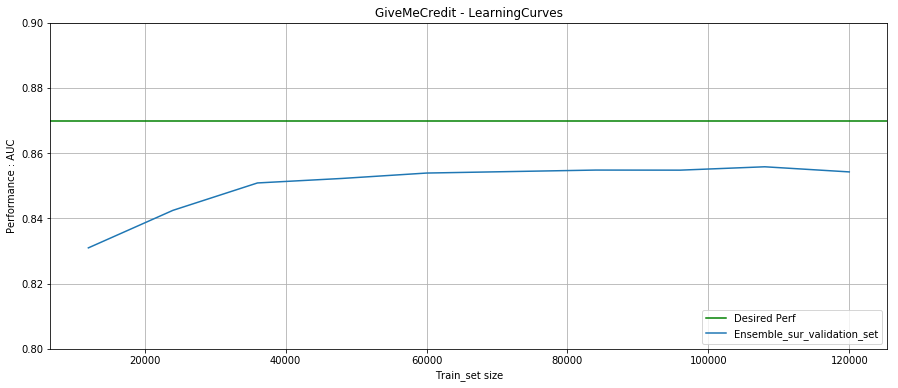

In [107]:
plt.xlabel("Train_set size")
plt.ylabel("Performance : AUC")
plt.title("GiveMeCredit - LearningCurves")
plt.grid()
plt.axhline(y=0.87, color = 'green', label="Desired Perf")
plt.ylim(0.8,0.9)
plt.plot(train_set_size_list, auc_ens_val_set, label= "Ensemble_sur_validation_set")
plt.legend(loc='lower right')

### Méthode pour la création des graphiques en fonction des "list" choisies

In [104]:
def create_plot(list1, list2, list3):
    plt.xlabel("Train_set size")
    plt.ylabel("Performance : AUC")
    plt.title("GiveMeCredit - LearningCurves")
    plt.grid()
    plt.axhline(y=0.87, color= 'green', label="Desired Perf")
    plt.rcParams['figure.figsize'] = [15 , 6]
    plt.ylim(0.82,0.975)
    plt.plot(list1, list2, color= 'blue')
    plt.plot(list1, list3, color= 'red')
    plt.legend(loc='lower right')
    plt.show()

### Graphique de l'évolution de la performance du modèle en fonction de la taille du train_set :

1. modèle ensemble (bleu) vs modèle deepnet (rouge) sur validation_set
2. modèle ensemble sur validation_set (bleu) et sur train_set (rouge)
3. modèle deepnet sur validation_set (bleu) et sur train_set (rouge)

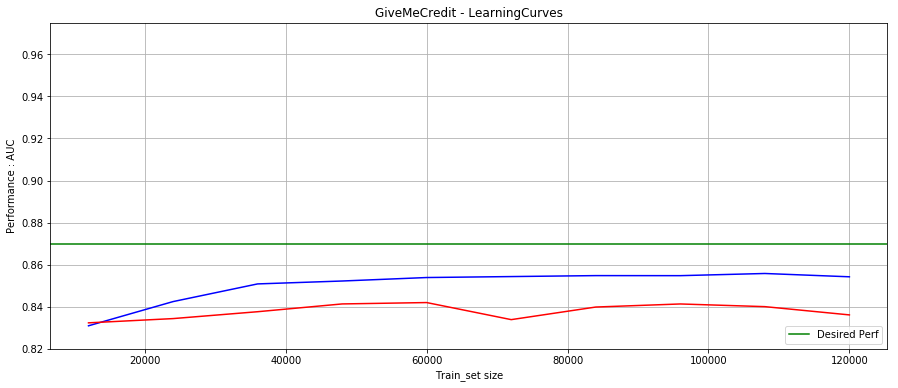

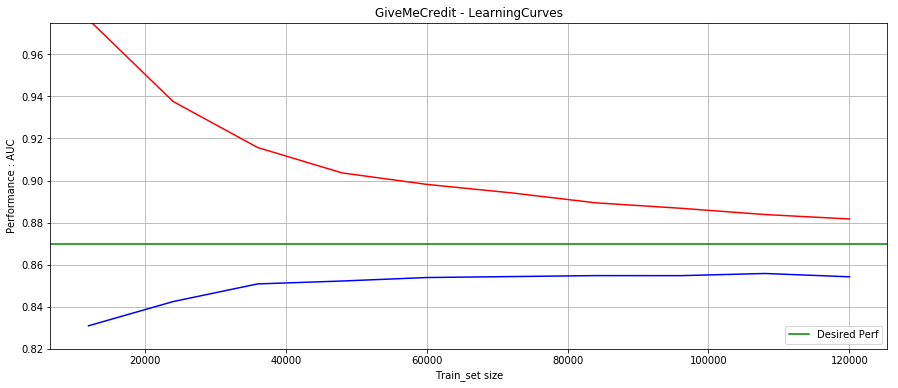

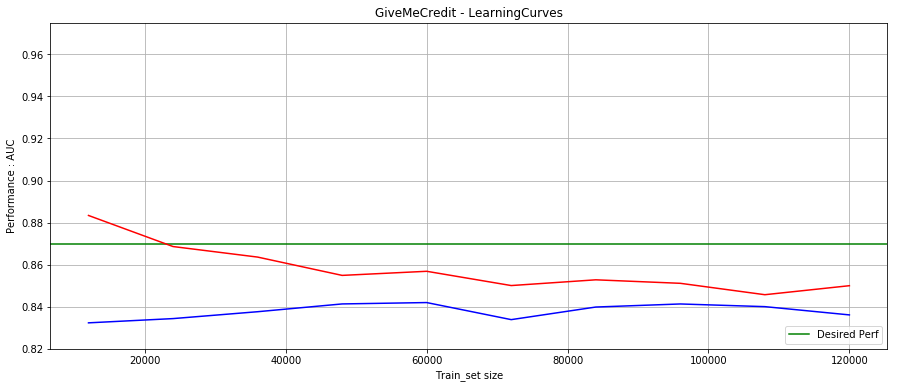

In [105]:
create_plot(train_set_size_list, auc_ens_val_set, auc_dn_val_set)

create_plot(train_set_size_list, auc_ens_val_set, auc_ens_train_set)

create_plot(train_set_size_list, auc_dn_val_set, auc_dn_train_set)